In [6]:
from pathlib import Path
import pandas as pd
import geopandas as gpd
import swifter

import numpy as np

import matplotlib.pyplot as plt
from convertbng.util import convert_bng

In [7]:
df_population = pd.read_csv("Data/PC_sectors.csv")

In [8]:
def postcode_shorten(postcode):
    return postcode[0:5]

header = ["Postcode", "Positional_quality_indicator", "Eastings", "Northings", "Country_code", "NHS_regional_HA_code", "NHS_HA_code", "Admin_county_code", "Admin_district_code", "Admin_ward_code"]


paths = Path("Data/Data/CSV").glob("*")

df_position = pd.concat((pd.read_csv(p, header=None, names=header) for p in paths))

df_position["_PC"] = df_position["Postcode"].map(postcode_shorten)
df_position

,Postcode,Positional_quality_indicator,Eastings,Northings,Country_code,NHS_regional_HA_code,NHS_HA_code,Admin_county_code,Admin_district_code,Admin_ward_code,_PC
0,AB101AB,10,394235,806529,S92000003,NaN,S08000020,NaN,S12000033,S13002842,AB101
1,AB101AF,10,394181,806429,S92000003,NaN,S08000020,NaN,S12000033,S13002842,AB101
2,AB101AG,10,394230,806469,S92000003,NaN,S08000020,NaN,S12000033,S13002842,AB101
3,AB101AH,10,394371,806359,S92000003,NaN,S08000020,NaN,S12000033,S13002842,AB101
4,AB101AL,10,394296,806581,S92000003,NaN,S08000020,NaN,S12000033,S13002842,AB101
...,...,...,...,...,...,...,...,...,...,...,...
646,ZE3 9JU,10,438872,1111807,S92000003,NaN,S08000026,NaN,S12000027,S13002776,ZE3 9
647,ZE3 9JW,10,438975,1110038,S92000003,NaN,S08000026,NaN,S12000027,S13002776,ZE3 9
648,ZE3 9JX,10,438872,1110219,S92000003,NaN,S08000026,NaN,S12000027,S13002776,ZE3 9
649,ZE3 9JY,10,438498,1112029,S92000003,NaN,S08000026,NaN,S12000027,S13002776,ZE3 9


In [9]:
gdf_position = gpd.GeoDataFrame(df_position, geometry=gpd.points_from_xy(df_position.Eastings, df_position.Northings))

In [10]:
gdf_position

,Postcode,Positional_quality_indicator,Eastings,Northings,Country_code,NHS_regional_HA_code,NHS_HA_code,Admin_county_code,Admin_district_code,Admin_ward_code,_PC,geometry
0,AB101AB,10,394235,806529,S92000003,NaN,S08000020,NaN,S12000033,S13002842,AB101,POINT (394235.000 806529.000)
1,AB101AF,10,394181,806429,S92000003,NaN,S08000020,NaN,S12000033,S13002842,AB101,POINT (394181.000 806429.000)
2,AB101AG,10,394230,806469,S92000003,NaN,S08000020,NaN,S12000033,S13002842,AB101,POINT (394230.000 806469.000)
3,AB101AH,10,394371,806359,S92000003,NaN,S08000020,NaN,S12000033,S13002842,AB101,POINT (394371.000 806359.000)
4,AB101AL,10,394296,806581,S92000003,NaN,S08000020,NaN,S12000033,S13002842,AB101,POINT (394296.000 806581.000)
...,...,...,...,...,...,...,...,...,...,...,...,...
646,ZE3 9JU,10,438872,1111807,S92000003,NaN,S08000026,NaN,S12000027,S13002776,ZE3 9,POINT (438872.000 1111807.000)
647,ZE3 9JW,10,438975,1110038,S92000003,NaN,S08000026,NaN,S12000027,S13002776,ZE3 9,POINT (438975.000 1110038.000)
648,ZE3 9JX,10,438872,1110219,S92000003,NaN,S08000026,NaN,S12000027,S13002776,ZE3 9,POINT (438872.000 1110219.000)
649,ZE3 9JY,10,438498,1112029,S92000003,NaN,S08000026,NaN,S12000027,S13002776,ZE3 9,POINT (438498.000 1112029.000)


<AxesSubplot:>

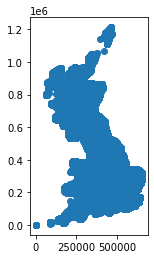

In [12]:
gdf_position.plot()

In [13]:
gdf_position.to_crs(epsg=4326)

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.